# Pymaceuticals Inc.
---

### Analysis

Observation 1: Capomulin and Ramicane stand out as having much smaller tumor size variance.

Observation 2: Of the selected drugs (Capomulin, Ramicane, Infubinol, and Ceftamin). Capomulin and Ramicane are much more effective at reducing the final tumor size.

Observation 3: The Capomulin regimen is less effective as the mouse's weight increases.

Analysis: Observations 1 and 2 make a compelling case that Capomulin and Ramicane are the most effective at reducing final tumor size. However, this is only one metric; the data provided has no information about side effects. It is possible that beyond 45 days other drugs would eventually overtake Capomulin or Ramicane with less severe side effects. In regards to observation 3, did all mice in the Capomulin regime receive the exact same dosage? If this is the case, then perhaps increasing dosage on larger mice will do away with, or flatten, this observed trend.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = data_complete["Mouse ID"].nunique()
mouse_count

249

In [108]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_IDs = list(data_complete.loc[data_complete.duplicated(['Mouse ID', 'Timepoint']), 'Mouse ID'].drop_duplicates())
duplicate_mouse_IDs

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
data_dupes_only = data_complete[data_complete['Mouse ID'].isin(duplicate_mouse_IDs)]
data_dupes_only

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_no_dupes = data_complete[~data_complete['Mouse ID'].isin(duplicate_mouse_IDs)]
data_no_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
data_no_dupes["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
by_drug = data_no_dupes.groupby(["Drug Regimen"])
summary_df = pd.DataFrame(
    {"Mean Tumor Volume": by_drug["Tumor Volume (mm3)"].mean(),
     "Median Tumor Volume": by_drug["Tumor Volume (mm3)"].median(),
     "Tumor Volume Variance": by_drug["Tumor Volume (mm3)"].var(),
     "Tumor Volume Std. Dev.": by_drug["Tumor Volume (mm3)"].std(),
     "Tumor Volume Std.Err.": by_drug["Tumor Volume (mm3)"].sem()
    })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
by_drug["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"], axis = "columns")

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

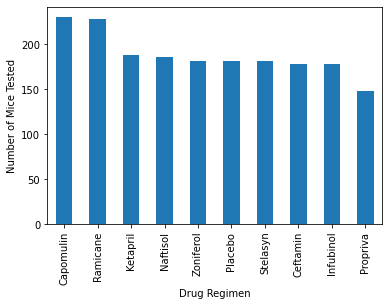

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
summary_df['Number of Mice Tested'] = by_drug["Tumor Volume (mm3)"].count()
summary_df = summary_df.sort_values(by=['Number of Mice Tested'], ascending = False)
summary_df.plot.bar(y='Number of Mice Tested', rot=90, legend=False).set_ylabel('Number of Mice Tested')

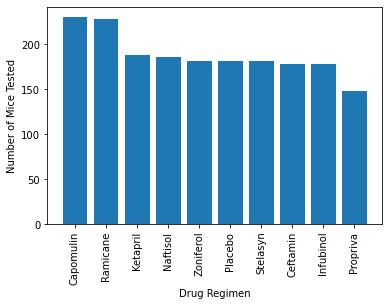

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
summary_df['Total Number of Timepoints'] = by_drug['Timepoint'].count()
summary_df = summary_df.sort_values(by=['Total Number of Timepoints'], ascending = False)

x_axis = np.arange(len(by_drug))

plt.bar(x_axis, summary_df['Total Number of Timepoints'], width=.8, align="edge")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
tick_locations = [value+.4 for value in x_axis]
plt.xticks(tick_locations, summary_df.index, rotation="vertical")
plt.show()

In [11]:
# sex_counts = data_no_dupes.drop_duplicates(['Mouse ID'], keep='first')['Sex'].value_counts()
sex_counts = data_no_dupes.drop_duplicates(['Mouse ID'], keep='first')['Sex'].value_counts()
sex_counts

Male      125
Female    123
Name: Sex, dtype: int64

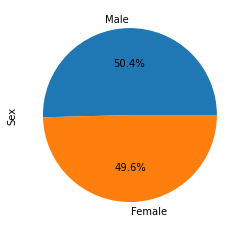

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts.plot(kind='pie', y='Sex', autopct="%1.1f%%")

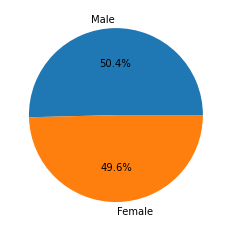

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels=['Male', 'Female'], autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = data_no_dupes.groupby(['Mouse ID'])[['Drug Regimen', 'Timepoint']].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoints = max_timepoints.merge(data_complete[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']],
                                                    how="inner", on=['Mouse ID', 'Timepoint']).reset_index(drop=True)
max_timepoints.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
selected_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for selected_drug in selected_drugs :
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    selected_drug_data = (max_timepoints[max_timepoints['Drug Regimen'] == selected_drug]['Tumor Volume (mm3)'])
    
    # add subset 
    tumor_vol_data.append(selected_drug_data)
    
    # Determine outliers using upper and lower bounds
    outliers = []
    Q3 = np.quantile(selected_drug_data, 0.75)
    Q1 = np.quantile(selected_drug_data, 0.25)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    for data in selected_drug_data:
        if ((data > upper_bound) | (data < lower_bound)):
            outliers.append(data)
    print("%s's IQR: %.2f" % (selected_drug, IQR))
    print(f"{selected_drug}'s potential outliers: {outliers}")

Capomulin's IQR: 7.78
Capomulin's potential outliers: []
Ramicane's IQR: 9.10
Ramicane's potential outliers: []
Infubinol's IQR: 11.48
Infubinol's potential outliers: [36.321345799999996]
Ceftamin's IQR: 15.58
Ceftamin's potential outliers: []


### Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

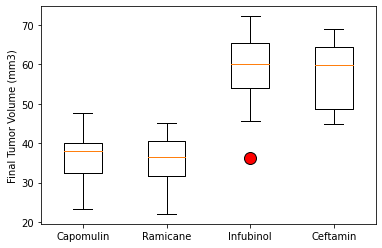

In [116]:
plt.figure(figsize=(6,4))
plt.boxplot(tumor_vol_data, labels=selected_drugs, 
            flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'r'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

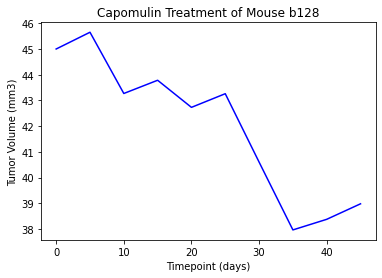

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = data_no_dupes[data_no_dupes['Drug Regimen'] == 'Capomulin']
sample_capomulin_mouse = capomulin_data.sample().reset_index()['Mouse ID'][0]
sample_capomulin_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == sample_capomulin_mouse]
plt.plot(sample_capomulin_mouse_data['Timepoint'], 
         sample_capomulin_mouse_data['Tumor Volume (mm3)'], 
         color='blue', label='Capomulin')
plt.title("Capomulin Treatment of Mouse %s" % sample_capomulin_mouse)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

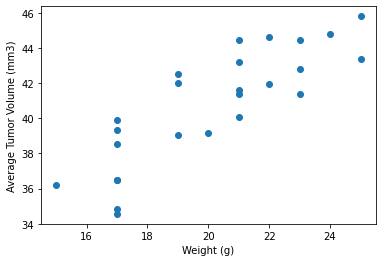

In [118]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = capomulin_data.groupby(['Mouse ID'])['Weight (g)'].mean()
y_values = capomulin_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


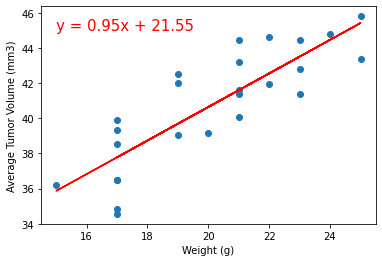

In [119]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(15,45),fontsize=15,color="red")
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()